# DAT210x - Programming with Python for DS

## Module5- Lab9

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# .. your code here ..
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
matplotlib.style.use('ggplot') # Look Pretty

from sklearn.metrics import r2_score
from sklearn import preprocessing

C:\Users\alloq\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### A Convenience Function

This convenience method will take care of plotting your test observations, comparing them to the regression line, and displaying the R2 coefficient

In [2]:
def drawLine(model, X_test, y_test, title, R2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    title += " R2: " + str(R2)
    ax.set_title(title)
    print(title)
    print("Intercept(s): ", model.intercept_)

    plt.show()

In [3]:
def drawPlane(model, X_test, y_test, title, R2):
    # This convenience method will take care of plotting your
    # test observations, comparing them to the regression plane,
    # and displaying the R2 coefficient
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_zlabel('prediction')

    
    # You might have passed in a DataFrame, a Series (slice),
    # an NDArray, or a Python List... so let's keep it simple:
    X_test = np.array(X_test)
    col1 = X_test[:,0]
    col2 = X_test[:,1]

    
    # Set up a Grid. We could have predicted on the actual
    # col1, col2 values directly; but that would have generated
    # a mesh with WAY too fine a grid, which would have detracted
    # from the visualization
    x_min, x_max = col1.min(), col1.max()
    y_min, y_max = col2.min(), col2.max()
    x = np.arange(x_min, x_max, (x_max-x_min) / 10)
    y = np.arange(y_min, y_max, (y_max-y_min) / 10)
    x, y = np.meshgrid(x, y)

    
    # Predict based on possible input values that span the domain
    # of the x and y inputs:
    z = model.predict(  np.c_[x.ravel(), y.ravel()]  )
    z = z.reshape(x.shape)

    
    ax.scatter(col1, col2, y_test, c='g', marker='o')
    ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)

    title += " R2: " + str(R2)
    ax.set_title(title)
    print(title)
    print("Intercept(s): ", model.intercept_)

    plt.show()

### The Assignment

Let's get started!

First, as is your habit, inspect your dataset in a text editor, or spread sheet application. The first thing you should notice is that the first column is both unique (the name of each) college, as well as unlabeled. This is a HINT that it must be the index column. If you do not indicate to Pandas that you already have an index column, it'll create one for you, which would be undesirable since you already have one.

Review the `.read_csv()` documentation and discern how to load up a dataframe while indicating which existing column is to be taken as an index. Then, load up the College dataset into a variable called `X`:

In [4]:
# .. your code here ..
X = pd.read_csv('Datasets/College.csv', index_col = 0)
X.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
X.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


This line isn't necessary for your purposes; but we'd just like to show you an additional way to encode features directly. The `.map()` method is like `.apply()`, but instead of taking in a lambda / function, you simply provide a mapping of keys:values. If you decide to embark on the "Data Scientist Challenge", this line of code will save you the trouble of converting it through other means:

In [6]:
X.Private = X.Private.map({'Yes':1, 'No':0})

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

T = preprocessing.MinMaxScaler().fit_transform(X)
#T = preprocessing.MaxAbsScaler().fit_transform(X)
T1 = preprocessing.Normalizer().fit_transform(X)
#T = preprocessing.StandardScaler().fit_transform(X)
#T = X # No Change
T

array([[1.        , 0.03288693, 0.04417701, ..., 0.1875    , 0.0726714 ,
        0.46296296],
       [1.        , 0.04384229, 0.07053089, ..., 0.25      , 0.13838671,
        0.42592593],
       [1.        , 0.0280549 , 0.03903572, ..., 0.46875   , 0.10460535,
        0.40740741],
       ...,
       [1.        , 0.04198863, 0.07018813, ..., 0.3125    , 0.09683865,
        0.36111111],
       [1.        , 0.22127341, 0.09067713, ..., 0.765625  , 0.70126492,
        0.82407407],
       [1.        , 0.06056693, 0.06790312, ..., 0.4375    , 0.02494015,
        0.82407407]])

In [8]:
T1

array([[8.62951449e-05, 1.43249940e-01, 1.06315618e-01, ...,
        1.03554174e-03, 6.07604115e-01, 5.17770869e-03],
       [5.55998435e-05, 1.21541258e-01, 1.06974099e-01, ...,
        8.89597495e-04, 5.85299552e-01, 3.11359123e-03],
       [6.69806986e-05, 9.56484376e-02, 7.34778263e-02, ...,
        2.00942096e-03, 5.85076402e-01, 3.61695772e-03],
       ...,
       [8.11355239e-05, 1.70141194e-01, 1.55374528e-01, ...,
        1.62271048e-03, 6.75290965e-01, 3.97564067e-03],
       [2.12165224e-05, 2.27122872e-01, 5.20441295e-02, ...,
        1.03960960e-03, 8.56850474e-01, 2.10043572e-03],
       [1.08783055e-04, 3.25152552e-01, 2.01792567e-01, ...,
        3.04592555e-03, 4.90502796e-01, 1.07695225e-02]])

Create your linear regression model here and store it in a variable called `model`. Don't actually train or do anything else with it yet:

In [9]:
# .. your code here ..
model = LinearRegression()

The first relationship we're interested in is the number of accepted students, as a function of the amount charged for room and board.

Using indexing, create two slices (series). One will just store the room and board column, the other will store the accepted students column. Then use train_test_split to cut your data up into `X_train`, `X_test`, `y_train`, `y_test`, with a `test_size` of 30% and a random_state of 7.

In [10]:
# .. your code here ..
y1 = X['Accept']
x1 = X[['Room.Board']]

X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=7)

Fit and score your model appropriately. Store the score in the `score` variable.

In [11]:
# .. your code here ..
model1 = model.fit(X1_train, y1_train)
score1 = model1.score(X1_test, y1_test)
y1_predict = model1.predict(X1_test)
r2_score(y1_test, y1_predict)

-0.0026669864145500988

We'll take it from here, buddy:

Accept(Room&Board) R2: -0.0026669864145500983
Intercept(s):  1340.619565189838


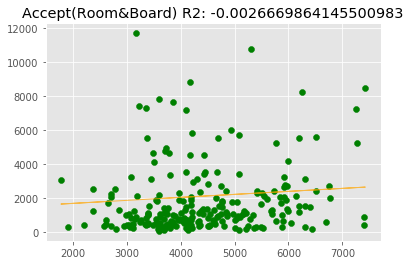

In [12]:
drawLine(model1, X1_test, y1_test, "Accept(Room&Board)", score1)
#No correlation between accepted students and amount of room charged on average at that school

Duplicate the process above; this time, model the number of accepted students, as a function of the number of enrolled students per college.

In [13]:
# .. your code here ..
x2 = X[['Enroll']]
y2 = X['Accept']
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.3, random_state = 7)
model2 = model.fit(X2_train, y2_train)
score2 = model2.score(X2_test, y2_test)
y2_predict = model2.predict(X2_test)
r2_score(y2_test, y2_predict)

0.8578204867356156

Accept(Enroll) R2: 0.8578204867356156
Intercept(s):  151.72611242276275


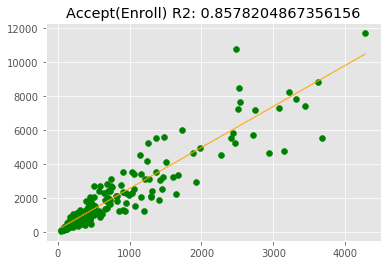

In [14]:
drawLine(model2, X2_test, y2_test, "Accept(Enroll)", score2)
#Strong correlation between accepted students and students enrollment. Students most likely choose to enter the school 
#which accepted them.

Duplicate the process above; this time, model the number of accepted students, as as function of the number of failed undergraduate students per college.

In [15]:
# .. your code here ..
x3 = X[['F.Undergrad']]
y3 = X['Accept']

X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.3, random_state = 7)
model3 = model.fit(X3_train, y3_train)
score3 = model3.score
y3_predict = model3.predict(X3_test)
r2_score(y3_test, y3_predict)

0.7779917973754006

Accept(F.Undergrad) R2: <bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>
Intercept(s):  380.94291049842764


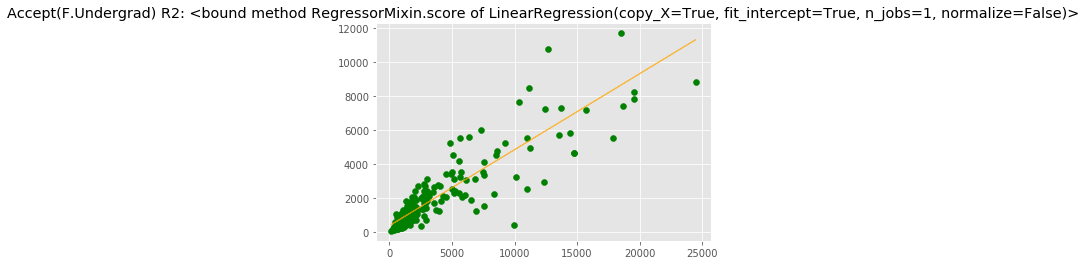

In [16]:
drawLine(model3, X3_test, y3_test, "Accept(F.Undergrad)", score3)
#The correlation between accepted students and failed undergrads are strong but not as strong as the previous one.
#This suggests more students accepted by the school, more failed undergraduate students occured.

Duplicate the process above (almost). This time is going to be a bit more complicated. Instead of modeling one feature as a function of another, you will attempt to do multivariate linear regression to model one feature as a function of TWO other features.

Model the number of accepted students as a function of the amount charged for room and board _and_ the number of enrolled students. To do this, instead of creating a regular slice for a single-feature input, simply create a slice that contains both columns you wish to use as inputs. Your training labels will remain a single slice.

In [17]:
# .. your code here ..
x4 = X[['Room.Board', 'Enroll']]
y4 = X['Accept']
X4_train, X4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.3, random_state = 7)
model4 = model.fit(X4_train, y4_train)
score4 = model4.score(X4_test, y4_test)
y4_predict = model4.predict(X4_test)
r2_score(y4_test, y4_predict)


0.8764371774214047

Accept(Room&Board,Enroll) R2: 0.8764371774214047
Intercept(s):  -1176.6284824940835


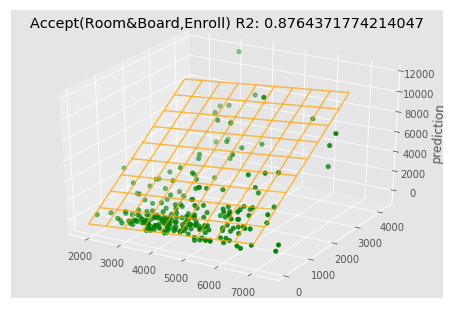

In [18]:
drawPlane(model4, X4_test, y4_test, "Accept(Room&Board,Enroll)", score4)

In [ ]:
#The Enroll feature is strongly correlated to Accept, and Room Rate is not correlated to Accept. More regression analysis
#can be performed to see other correlations among features. Other modeling techniques include KMeans, a clustering
#machine learning technique can be used to determine other unique insights.

That concludes this assignment!

### Notes On Fitting, Scoring, and Predicting:

Here's a hint to help you complete the assignment without pulling your hair out! When you use `.fit()`, `.score()`, and `.predict()` on your model, SciKit-Learn expects your training data to be in spreadsheet (2D Array-Like) form. This means you can't simply pass in a 1D Array (slice) and get away with it.

To properly prep your data, you have to pass in a 2D Numpy Array, or a dataframe. But what happens if you really only want to pass in a single feature?

If you slice your dataframe using `df[['ColumnName']]` syntax, the result that comes back is actually a _dataframe_. Go ahead and do a `type()` on it to check it out. Since it's already a dataframe, you're good -- no further changes needed.

But if you slice your dataframe using the `df.ColumnName` syntax, OR if you call `df['ColumnName']`, the result that comes back is actually a series (1D Array)! This will cause SKLearn to bug out. So if you are slicing using either of those two techniques, before sending your training or testing data to `.fit` / `.score`, do `any_column = my_column.reshape(-1,1)`. 

This will convert your 1D array of `[n_samples]`, to a 2D array shaped like `[n_samples, 1]`. A single feature, with many samples.

If you did something like `my_column = [my_column]`, that would produce an array in the shape of `[1, n_samples]`, which is incorrect because SKLearn expects your data to be arranged as `[n_samples, n_features]`. Keep in mind, all of the above only relates to your `X` or input data, and does not apply to your `y` or labels.

### Data Scientist Challenge

You've experimented with a number of feature scaling techniques already, such as `MaxAbsScaler`, `MinMaxScaler`, `Normalizer`, `StandardScaler` and more from http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing.

What happens if you apply scaling to your data before doing  linear regression? Would it alter the quality of your results? Do the scalers that work on a per-feature basis, such as `MinMaxScaler` behave differently that those that work on a multi-feature basis, such as normalize? And moreover, once your features have been scaled, you won't be able to use the resulting regression directly... unless you're able to `.inverse_transform()` the scaling. Do all of the SciKit-Learn scalers support that?

This is your time to shine and to show how much of an explorer you are: Dive deeper into uncharted lands, browse SciKit-Learn's documentation, scour Google, ask questions on Quora, Stack-Overflow, and the course message board, and see if you can discover something that will be of benefit to you in the future!

In [19]:
#The scaling is sets of Numpy Arrays. Each scaling alter the results according to the property of the scaling.
#The MinMaxScaler() and Normalizer() behave similarly. All three scaling techniques except Normalizer() 
#contain the .inverse_transform() methods which undo the scaling of the arrays back to its original
#form.

In [20]:
#Question

# Which two relationship had the worst R2 correlations?
#Answer: The worst two correlations are Accept(Room&Board) and Accept(F.Undergrad)